In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from matplotlib.colors import ListedColormap
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn_som.som import SOM

In [2]:
dataFrame=pd.read_csv('heart.csv')
dataFrame.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
dataFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
dataFrame.shape

(303, 14)

In [5]:
X=dataFrame.drop('output',axis=1)
Y=dataFrame['output']

In [6]:
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(227, 13) (227,)
(76, 13) (76,)


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [9]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
c=columns=dataFrame.columns
pd.DataFrame(X_train,columns=c.drop('output')).head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,-1.426868,0.660840,-0.969924,-1.272285,-1.398383,-0.419721,-1.008781,0.348036,-0.702439,-0.894700,0.985218,-0.678620,1.176765
1,0.341260,0.660840,-0.969924,-1.272285,-0.850368,-0.419721,0.868213,-1.050268,1.423610,0.406091,-0.671408,-0.678620,-2.226109
2,-1.868900,-1.513227,0.995904,-0.677294,-0.585809,-0.419721,0.868213,0.872400,-0.702439,-0.894700,0.985218,-0.678620,-0.524672
3,0.893801,-1.513227,0.995904,-0.082303,0.321250,-0.419721,0.868213,-2.317482,-0.702439,0.145933,-0.671408,0.308859,1.176765
4,0.341260,-1.513227,-0.969924,0.512688,-0.094485,-0.419721,0.868213,-1.181359,1.423610,-0.721261,-0.671408,-0.678620,1.176765
5,1.556849,0.660840,0.995904,2.892653,0.529118,2.382534,-1.008781,-0.001540,1.423610,0.492811,-0.671408,-0.678620,1.176765
6,0.341260,0.660840,-0.969924,1.226678,0.529118,-0.419721,0.868213,-2.710755,1.423610,0.145933,-0.671408,0.308859,1.176765
7,-2.200424,0.660840,1.978819,-0.796292,-1.209412,-0.419721,-1.008781,1.047188,-0.702439,-0.894700,0.985218,-0.678620,-0.524672
8,-1.095344,0.660840,0.012990,-0.677294,0.321250,-0.419721,0.868213,1.003491,-0.702439,-0.894700,0.985218,-0.678620,1.176765
9,1.225325,-1.513227,0.995904,1.702671,2.154265,-0.419721,-1.008781,0.042157,-0.702439,-0.200944,0.985218,-0.678620,-0.524672


(76, 13)

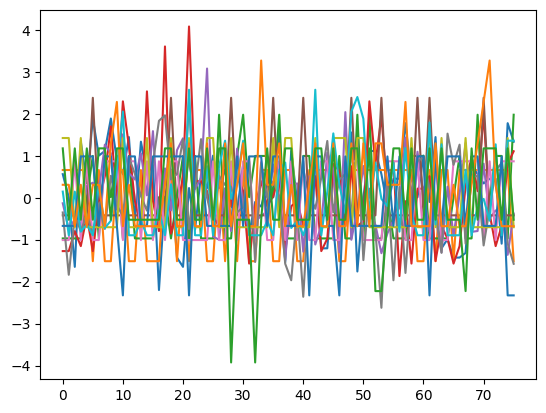

In [10]:
plt.plot(X_test, label='TEST SET')
X_test.shape

(76,)

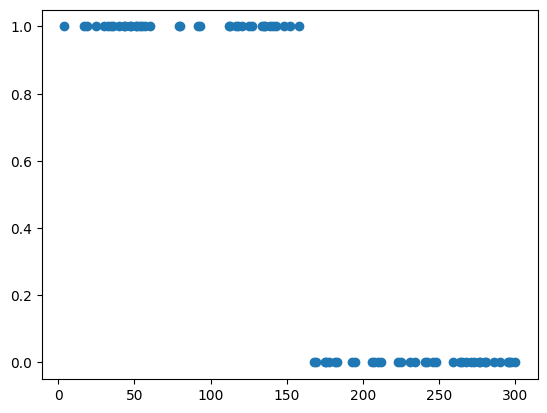

In [11]:
plt.plot(Y_test, 'o', label='TEST SET')
Y_test.shape

MLP

In [12]:
mlp=MLPClassifier(hidden_layer_sizes=(10,12,13),max_iter=10000)
mlp.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(10, 12, 13), max_iter=10000)

In [13]:
predictions = mlp.predict(X_test)
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [14]:
Y_test.head()

87     1
0      1
107    1
153    1
34     1
Name: output, dtype: int64

In [15]:
spredictions = pd.Series(data=predictions, index=Y_test.index)

In [16]:
spredictions.index

Int64Index([ 87,   0, 107, 153,  34, 144,  85, 132,  41, 286,  94, 142,  84,
            157, 227, 228, 163, 273, 269, 174, 235, 166, 289,  72,  17, 262,
             74, 267, 224, 280, 193, 138, 220, 110, 116, 192, 127, 212, 139,
            290, 206,   7, 197, 287, 190, 244,  64,  66,  50,  26, 103, 154,
             95,  75, 209,  83,  13,  30,  14,  65, 214, 122, 104,  76,  12,
             56,  58, 128,  82, 204, 247, 299, 213, 296, 278,  39],
           dtype='int64')

In [17]:
Y_test.index

Int64Index([ 87,   0, 107, 153,  34, 144,  85, 132,  41, 286,  94, 142,  84,
            157, 227, 228, 163, 273, 269, 174, 235, 166, 289,  72,  17, 262,
             74, 267, 224, 280, 193, 138, 220, 110, 116, 192, 127, 212, 139,
            290, 206,   7, 197, 287, 190, 244,  64,  66,  50,  26, 103, 154,
             95,  75, 209,  83,  13,  30,  14,  65, 214, 122, 104,  76,  12,
             56,  58, 128,  82, 204, 247, 299, 213, 296, 278,  39],
           dtype='int64')

(76,)

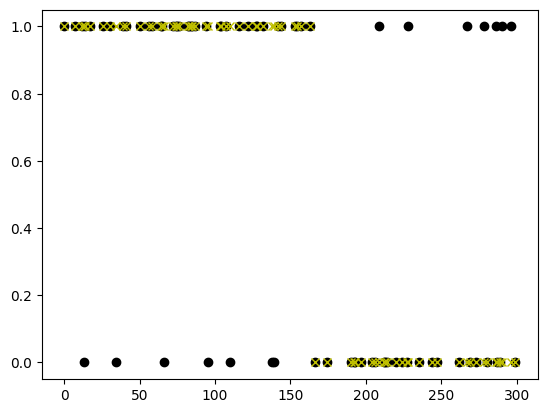

In [18]:
plt.plot(spredictions, 'ko', Y_test,'yx')
predictions.shape

In [19]:
print(confusion_matrix(Y_test,spredictions))

[[24  7]
 [ 7 38]]


In [20]:
print(classification_report(Y_test,spredictions))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        31
           1       0.84      0.84      0.84        45

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



RBF

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
# from rbflayer import RBFLayer
from sklearn.cluster import KMeans
# from tensorflow.keras.initializers import InitCentersKMeans
import matplotlib.pyplot as plt


import tensorflow as tf
# import tensorflow.contrib.keras as keras
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import RandomUniform, Initializer, Constant
from sklearn.cluster import KMeans
import numpy as np


class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X
        super().__init__()

    def __call__(self, shape, dtype=None):
        assert shape[1:] == self.X.shape[1:]  # check dimension
        # np.random.randint returns ints from [low, high) !
        idx = np.random.randint(self.X.shape[0], size=shape[0])

        return self.X[idx, :]

class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter
        super().__init__()

    def __call__(self, shape, dtype=None):
        assert shape[1:] == self.X.shape[1:]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):

        self.output_dim = output_dim

        # betas is either initializer object or float
        if isinstance(betas, Initializer):
            self.betas_initializer = betas
        else:
            self.betas_initializer = Constant(value=betas)

        self.initializer = initializer if initializer else RandomUniform(
            0.0, 1.0)

        super().__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=self.betas_initializer,
                                     # initializer='ones',
                                     trainable=True)

        super().build(input_shape)

    def call(self, x):

        C = tf.expand_dims(self.centers, -1)  # inserts a dimension of 1
        H = tf.transpose(C-tf.transpose(x))  # matrix of differences
        return tf.exp(-self.betas * tf.math.reduce_sum(H**2, axis=1))

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super().get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [57]:
rbf = Sequential() # creating RBFLayer with centers found randomly 
rbflayer = RBFLayer(10, initializer=InitCentersKMeans(X_train), betas=2.0, input_shape=(13,))
rbf.add(rbflayer)
rbf.add(Dense(8,activation='relu'))
rbf.add(Dense(6,activation='relu'))
rbf.add(Dense(4,activation='sigmoid'))
rbf.add(Dense(1))

# Compile the model with mean squared error loss and RMSprop optimizer
rbf.compile(loss='mean_squared_error', optimizer='RMSprop')

# Fit the model to the training data
rbf.fit(X_train, Y_train, batch_size=50, epochs=1500, verbose=1)

Epoch 1/1500


c:\Users\chelg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5/5 [==============================] - 1s 2ms/step - loss: 0.3616
Epoch 2/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 3/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 4/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 5/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.3119
Epoch 6/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.3041
Epoch 7/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2970
Epoch 8/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 9/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 10/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2795
Epoch 11/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 12/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 13/1500
5/5 [==============================] - 0s 2ms/st

In [58]:
predictions=rbf.predict(X_test)
predictions

3/3 [==============================] - 0s 2ms/step


array([[0.9436764 ],
       [0.9618017 ],
       [0.06284873],
       [0.11265133],
       [0.08722304],
       [0.66951305],
       [0.13253509],
       [0.06140311],
       [0.8469438 ],
       [0.9488098 ],
       [0.0802971 ],
       [0.94472855],
       [0.05395849],
       [0.89648515],
       [0.8928401 ],
       [0.8659069 ],
       [0.08380054],
       [0.14137657],
       [0.7842217 ],
       [0.94316906],
       [0.62067944],
       [0.8284232 ],
       [0.99086744],
       [0.10561033],
       [0.9170515 ],
       [0.06195687],
       [0.8776807 ],
       [0.88273495],
       [0.92812735],
       [0.9699623 ],
       [0.06143759],
       [0.8716083 ],
       [0.08098428],
       [0.05788361],
       [0.88563925],
       [0.88124794],
       [0.07282586],
       [0.27127695],
       [0.07551722],
       [0.994698  ],
       [0.9350106 ],
       [0.9530458 ],
       [0.9265197 ],
       [0.9335759 ],
       [0.9035904 ],
       [0.92470175],
       [0.9506007 ],
       [0.847

In [59]:
predictions=pd.DataFrame(predictions)
predictions.head(10)

,0
0,0.943676
1,0.961802
2,0.062849
3,0.112651
4,0.087223
5,0.669513
6,0.132535
7,0.061403
8,0.846944
9,0.948810


In [60]:
predictions[0]=np.round(predictions[0])

predictions=np.asarray(predictions[0])
predictions

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

(76,)

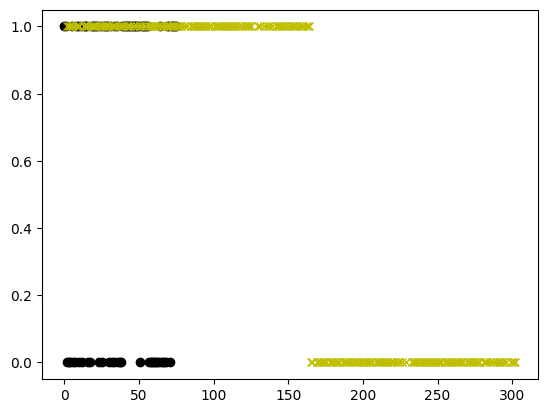

In [61]:
plt.plot(predictions, 'ko', Y_train,'yx')
predictions.shape

In [27]:
print(confusion_matrix(Y_test,predictions))

[[26  5]
 [ 6 39]]


In [63]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.85      0.89      0.87        44

    accuracy                           0.84        76
   macro avg       0.84      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



Carte SOM

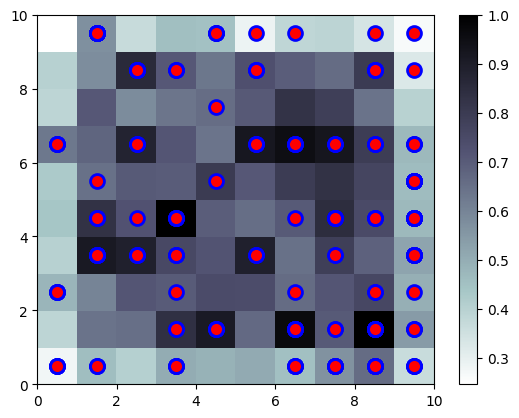

In [142]:
# initialize SOM
som = MiniSom(10, 10, X_train.shape[1], sigma=1.0, learning_rate=0.5)
som.train(X_train, 100)

# plot SOM
plt.figure()
plt.pcolor(som.distance_map().T, cmap='bone_r') # plot distance map as background
plt.colorbar()

# plot data points on the map
for i, x in enumerate(X_train):
    w = som.winner(x)  # get the winner neuron for each sample
    plt.plot(w[0]+0.5, w[1]+0.5, 'ko', markerfacecolor='red', markeredgecolor='blue', markersize=10, markeredgewidth=2)

plt.show()


In [12]:
som = SOM(m=2, n=1, dim=13, random_state=20000)
som.fit(X_train)

In [16]:
Y_train[:10]

189    0
138    1
115    1
216    0
298    0
203    0
243    0
58     1
7      1
39     1
Name: output, dtype: int64

In [13]:
predictions = som.predict(X_train)
predictions[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

(227,)

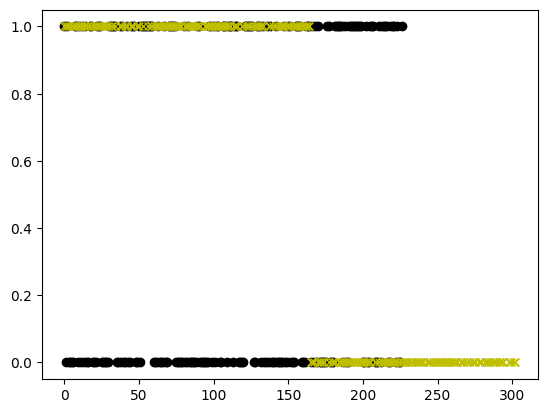

In [17]:
plt.plot(predictions, 'ko', Y_train,'yx')
predictions.shape

In [14]:
print(confusion_matrix(Y_train,predictions))

[[81 20]
 [31 95]]


In [15]:
print(classification_report(Y_train,predictions))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       101
           1       0.83      0.75      0.79       126

    accuracy                           0.78       227
   macro avg       0.77      0.78      0.77       227
weighted avg       0.78      0.78      0.78       227

